# Classification of Handwritten digits using CNN

In [1]:
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = load_digits()
X = data.images
y = data.target

In [3]:
# Preprocess the data
# important step

X = X.reshape((X.shape[0], 8, 8, 1))

# X.shape[0] = is for number of samples
# 8,8 is for the size of the image
# 1 is for grayscale, 3 for RGB images

X = X.astype("float32") / 255
# convert the data type to float32 and normalize the data values to the range 0-1

y = to_categorical(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [4]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# Create the model
model = Sequential()

# For CNN
# We are using 32 filters of size 3x3 each and
# our input image is 8x8 with a single channel
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
# Define early stopping callback and model checkpoint callback (optional)
early_stopping = EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="val_loss", save_best_only=True, mode="min"
)

In [7]:
# Compile the model
# loss = categorical_crossentropy not sparse_categorical_crossentropy
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/50
45/45 [==============================] - 0s 4ms/step - loss: 2.2842 - accuracy: 0.2575 - val_loss: 2.2536 - val_accuracy: 0.3278
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.2008 - accuracy: 0.4454 - val_loss: 2.1144 - val_accuracy: 0.5667
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 1.9770 - accuracy: 0.6722 - val_loss: 1.7866 - val_accuracy: 0.6611


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.5862 - accuracy: 0.7697 - val_loss: 1.3310 - val_accuracy: 0.7944
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.1639 - accuracy: 0.8267 - val_loss: 0.9886 - val_accuracy: 0.8028
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.8372 - val_loss: 0.7503 - val_accuracy: 0.8500
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.8615 - val_loss: 0.6085 - val_accuracy: 0.8639
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8727 - val_loss: 0.5234 - val_accuracy: 0.8556
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8824 - val_loss: 0.4627 - val_accuracy: 0.8833
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8887 - val_loss: 0.4377 - val_accuracy: 0.8778
Epoch 11/50
45/45 [

In [9]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_confusion = np.argmax(y_test, axis=1)
confusion_matrix(y_test_confusion, y_pred)

12/12 [==============================] - 0s 727us/step


array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0, 32]], dtype=int64)

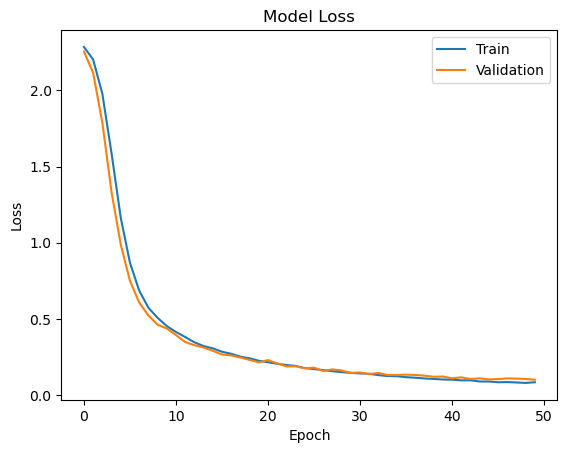

In [10]:
# Plot the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

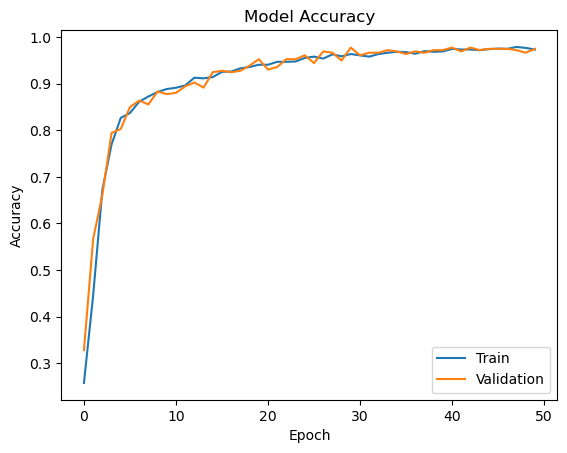

In [11]:
# Plot the training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()

In [12]:
# Loading wieghts that gave best validation accuracy
model.load_weights("best_model.h5")

In [13]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

 1/12 [=>............................] - ETA: 0s - loss: 0.0323 - accuracy: 1.0000

12/12 [==============================] - 0s 909us/step - loss: 0.1021 - accuracy: 0.9750
Test loss: 0.10213513672351837
Test accuracy: 0.9750000238418579
